## Monte Carlo Simulation of People Distribution

The technique to save computation time is to first generate the maximum number of people (where the floor would obviously break), and then remove points randomly each time and check again to make sure the floor hasn't survived. When it first survives this is the max capacity for that distribution. Will keep descending to see if removing more points changes anything. Repeat with a new point distribution again.

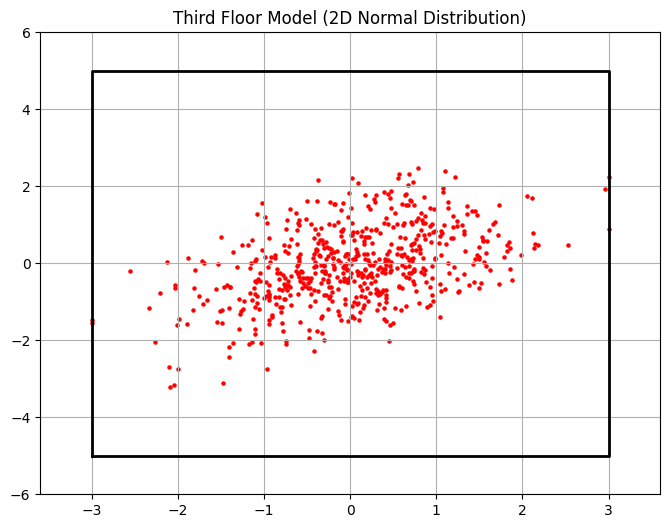

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Earth gravity constant
G = 9.81
# Define the box limits
box_left = -3
box_right = 3
box_bottom = -5
box_top = 5

# Calculate the box dimensions
box_width = box_right - box_left
box_height = box_top - box_bottom

# Define the desired number of points
number_people = 600
number_points = number_people*2

# Generate points from a 2D normal distribution
mean = [0, 0]  # Center of the distribution
covariance_matrix = [[1, 0.5], [0.5, 1]]  # Covariance matrix (adjust as needed)

# Generate points
points = np.random.multivariate_normal(mean, covariance_matrix, number_points)

# Clip points to stay within the box
points[:, 0] = np.clip(points[:, 0], box_left, box_right)
points[:, 1] = np.clip(points[:, 1], box_bottom, box_top)

# Personal space limit- remove points that aren't separated.
# Calculate distances between all points
def calculate_distance(point1, point2):
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

# Remove overlapping points - TO DO

points = points[:number_people]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the box
plt.plot([box_left, box_left + box_width, box_left + box_width, box_left, box_left],
         [box_bottom, box_bottom, box_top, box_top, box_bottom], color='black', linewidth=2)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='red', s=5)

# Set plot labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Third Floor Model (2D Normal Distribution)')

# Set axis limits slightly larger than the box
plt.xlim([box_left - box_width * 0.1, box_right + box_width * 0.1])
plt.ylim([box_bottom - box_height * 0.1, box_top + box_height * 0.1])

# Show the plot
plt.grid(True)
plt.show()

Now create a heatmap of the points. - still to do.

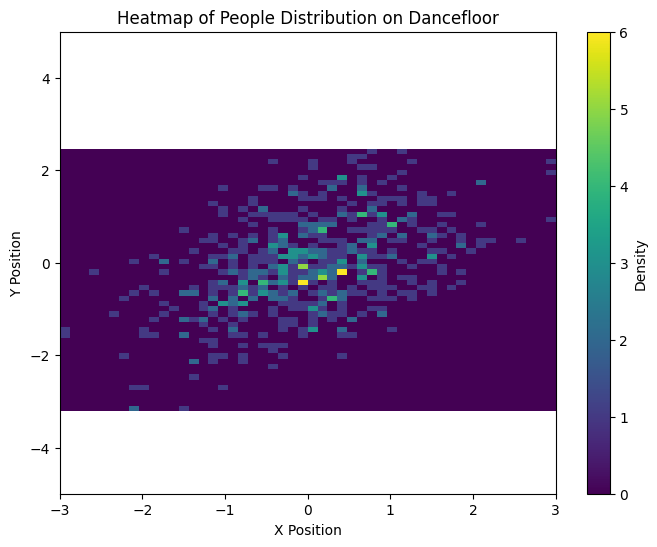

In [ ]:
# Create a heatmap using plt.hist2d()
plt.figure(figsize=(8, 6))
plt.hist2d(points[:, 0], points[:, 1], bins=50, cmap='viridis')

# Add colorbar for reference
plt.colorbar(label='Density')

# Set plot labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Heatmap of People Distribution on Dancefloor')

# Set axis limits to match the box
plt.xlim(box_left, box_right)
plt.ylim(box_bottom, box_top)

# Show the plot
plt.grid(False)
plt.show()

600
Random human weights:
[66.47676315114606, 84.27217411156745, 68.78388226798533, 84.22712968781607, 60.841772332660184, 75.40946251415141, 66.66516584955806, 79.9371934807429, 70.20975798584247, 71.63591142164601, 64.01595752119901, 65.889080152118, 59.030970669746345, 85.78639454439823, 86.00363193989214, 76.95674521671617, 72.71878152439253, 59.318348890785295, 81.05045126599937, 69.83779463912714, 82.34917867567277, 73.42453686979783, 83.24107233840392, 76.41135015959318, 78.22938038475411, 59.60578196160717, 81.78694940106551, 82.80650001868449, 61.503217502000915, 74.07524347933901, 84.58041409550239, 61.83645623745048, 80.49337603895887, 85.69007706568517, 71.86444582755338, 56.23861565401636, 73.73251754351219, 63.05707898407768, 63.80232857772254, 46.152987925815204, 74.250808348454, 78.13159658682055, 103.22198282492502, 82.71189206245475, 68.43589610476697, 83.168687579307, 69.35801345401877, 64.21827850018286, 55.47920075922839, 74.00923804556965, 64.53517986658444, 83.87

Determining the map of force on the floor

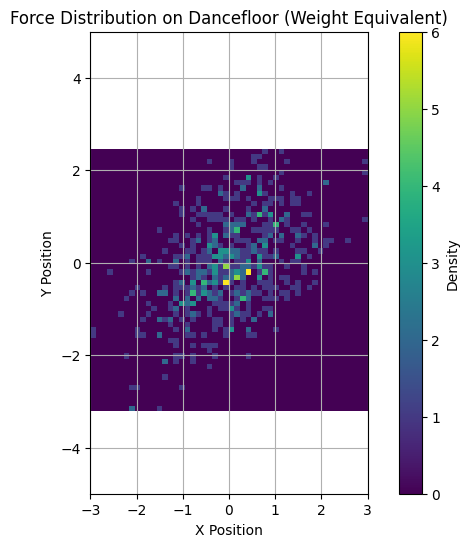

In [ ]:
# Assume a normal distribution for human weight
average_weight = 77.5  # kg (average human weight)
weight_std_dev = 12.5  # kg (standard deviation for the distribution)

# Generate weights for each person (normal distribution)
weights = np.random.normal(average_weight, weight_std_dev, number_people)

# Calculate gravitational force (weight) at each point
forces_at_points = weights * 9.8  # Gravitational acceleration on Earth (9.8 N/kg)

# Create the plot
plt.figure(figsize=(8, 6))
plt.hist2d(points[:, 0], points[:, 1], bins=50, cmap='viridis')

# Add colorbar for reference
plt.colorbar(label='Density')

# Set plot labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Force Distribution on Dancefloor (Weight Equivalent)')

# Set axis limits to match the box
plt.xlim(box_left, box_right)
plt.ylim(box_bottom, box_top)

# Set aspect ratio to make cells appear as squares
plt.gca().set_aspect('equal')

# Show the plot
plt.grid(True)
plt.show()

Work out the points which exceed the maximum load area (currently modelled as a constant). Yes I know code is messy- I don't give a shit

In [ ]:
def calculate_bending_moment(forces_at_points, area):
    # Initialize an empty array to store stress values
    stress_values = []

    for force in forces_at_points:
        # Assuming force is a scalar (total force at a point)
        stress = force / area
        stress_values.append(stress)

        # Calcuate distance to the point

        # Calculate bending moment at each point


    #update to return bending moment
    return stress_values

breaking_stress = 5000
#https://www.quora.com/How-much-weight-can-a-floor-support-before-it-collapses says about 5kN per m2 for a workshop floor


# Example usage:
total_area = 1  # Example total area (in square meters)

stress_results = calculate_stress(forces_at_points, total_area)
print("Maximal stress value:", np.max(stress_results),"N")
if np.max(stress_results)>=breaking_stress:
  print("The floor has broken")
else:
  print("The floor survives.")

Maximal stress value: 1000.1981752415684 N
The floor survives.
